In [438]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import seaborn as sns

## Cleaning

In [439]:
df = pd.read_csv("D:/University/third_course/MTAD/lab1/Spotify_Youtube.csv")

In [440]:
df = df.drop(columns = ["Unnamed: 0", "Url_spotify", "Uri", "Url_youtube"])
df = df.dropna()

In [441]:
df.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Duration_ms,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,...,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,...,200173.0,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,0.042500,...,215150.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,...,233867.0,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,...,340920.0,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [442]:
numeric_df = df.select_dtypes(include=['number'])
# numeric_df = numeric_df.drop(columns = ["Duration_ms", "Likes", "Comments", "Stream"])

In [443]:
df_cleaned = df.copy()

In [444]:
for column in numeric_df.columns:
    lower_bound = numeric_df[column].quantile(0.01)  
    upper_bound = numeric_df[column].quantile(0.99)  
    
    initial_count = df_cleaned.shape[0]
    df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    final_count = df_cleaned.shape[0]
    
    print(f"Column '{column}': removed {initial_count - final_count} rows.")
df_cleaned = df_cleaned.reset_index(drop=True)
print(f"Number of rows before removal: {df.shape[0]}")
print(f"Number of rows after removal: {df_cleaned.shape[0]}")


Column 'Danceability': removed 376 rows.
Column 'Energy': removed 321 rows.
Column 'Key': removed 0 rows.
Column 'Loudness': removed 203 rows.
Column 'Speechiness': removed 359 rows.
Column 'Acousticness': removed 230 rows.
Column 'Instrumentalness': removed 69 rows.
Column 'Liveness': removed 341 rows.
Column 'Valence': removed 192 rows.
Column 'Tempo': removed 266 rows.
Column 'Duration_ms': removed 243 rows.
Column 'Views': removed 291 rows.
Column 'Likes': removed 75 rows.
Column 'Comments': removed 50 rows.
Column 'Stream': removed 177 rows.
Number of rows before removal: 19170
Number of rows after removal: 15977


In [445]:
df_cleaned.to_csv('cleaned_data.csv')

In [446]:
numeric_cdf = df_cleaned.select_dtypes(include=['number'])
numeric_cdf.head()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
0,0.818,0.705,6.0,-6.679,0.1770,0.00836,0.002330,0.6130,0.772,138.559,222640.0,693555221.0,6220896.0,169907.0,1.040235e+09
1,0.676,0.703,8.0,-5.815,0.0302,0.08690,0.000687,0.0463,0.852,92.761,200173.0,72011645.0,1079128.0,31003.0,3.100837e+08
2,0.695,0.923,1.0,-3.930,0.0522,0.04250,0.046900,0.1160,0.551,108.014,215150.0,8435055.0,282142.0,7399.0,6.306347e+07
3,0.663,0.694,10.0,-8.627,0.1710,0.02530,0.000000,0.0698,0.525,167.953,340920.0,618480958.0,6197318.0,155930.0,6.172597e+08
4,0.760,0.891,11.0,-5.852,0.0372,0.02290,0.086900,0.2980,0.966,120.264,245000.0,259021161.0,1844658.0,72008.0,3.238503e+08


In [447]:
# one = 'Likes'
# two = 'Views'
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=df_cleaned[one], y=df_cleaned[two], color='blue', edgecolor='black')

# plt.title(f'Залежність {two} від {one}', fontsize=14)
# plt.xlabel(one, fontsize=12)
# plt.ylabel(two, fontsize=12)
# plt.grid(True)
# plt.show()

In [448]:
# plt.figure(figsize=(12, 6))
# sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Heatmap')
# plt.show()

In [449]:
# plt.figure(figsize=(12, 6))
# sns.heatmap(numeric_cdf.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Heatmap')
# plt.show()

### Порахувати середнє, усічене середнє, медіану, дисперсією, стандартне відхилення, середнє відхидення, абсолютно медіане відхилення. 

In [450]:
# Функція для обчислення середнього
def mean(column):
    return sum(column) / len(column)

# Функція для обчислення усіченого середнього
def trimmed_mean(column, trim_percent):
    sorted_col = sorted(column)
    trim_count = int(len(sorted_col) * trim_percent)
    trimmed_col = sorted_col[trim_count:-trim_count]
    return sum(trimmed_col) / len(trimmed_col)

# Функція для обчислення медіани
def median(column):
    sorted_col = sorted(column)
    n = len(sorted_col)
    mid = n // 2
    if n % 2 == 0:
        return (sorted_col[mid - 1] + sorted_col[mid]) / 2
    else:
        return sorted_col[mid]

# Функція для обчислення дисперсії
def variance(column):
    column_mean = mean(column)
    return sum((x - column_mean) ** 2 for x in column) / (len(column) - 1)

# Функція для обчислення стандартного відхилення
def std_dev(column):
    return variance(column) ** 0.5

# Функція для обчислення середнього відхилення
def mean_absolute_deviation(column):
    column_mean = mean(column)
    return sum(abs(x - column_mean) for x in column) / len(column)

# Функція для обчислення абсолютного медіанного відхилення
def median_absolute_deviation(column):
    col_median = median(column)
    deviations = [abs(x - col_median) for x in column]
    return median(deviations)

# Функція для обчислення всіх показників для обраних стовпців
def calculate_statistics(df, columns = None, trim_percent=0.1):
    if isinstance(columns, str):
        columns = [columns]
    elif columns is None:
        columns = df.columns

    results = {}
    for column in columns:
        col_data = df[column].dropna().tolist() 
        stats = {
            'mean': mean(col_data),
            'trimmed_mean': trimmed_mean(col_data, trim_percent),
            'median': median(col_data),
            'variance': variance(col_data),
            'std_dev': std_dev(col_data),
            'mean_absolute_deviation': mean_absolute_deviation(col_data),
            'median_absolute_deviation': median_absolute_deviation(col_data)
        }
        results[column] = stats
    results_df = pd.DataFrame(results).T
    return results_df


In [451]:
stats_one_column = calculate_statistics(numeric_cdf, 'Energy')
stats_one_column.head()

,mean,trimmed_mean,median,variance,std_dev,mean_absolute_deviation,median_absolute_deviation
Energy,0.645381,0.658525,0.67,0.036522,0.191107,0.154535,0.133


In [452]:
stats_multiple_columns = calculate_statistics(numeric_cdf, ['Energy', 'Loudness'])
stats_multiple_columns

,mean,trimmed_mean,median,variance,std_dev,mean_absolute_deviation,median_absolute_deviation
Energy,0.645381,0.658525,0.670,0.036522,0.191107,0.154535,0.133
Loudness,-7.141019,-6.717447,-6.436,10.470922,3.235880,2.392316,1.675


In [453]:
calculate_statistics(numeric_cdf)

,mean,trimmed_mean,median,variance,std_dev,mean_absolute_deviation,median_absolute_deviation
Danceability,6.331455e-01,6.401870e-01,6.470000e-01,2.216283e-02,1.488718e-01,1.209495e-01,1.040000e-01
Energy,6.453813e-01,6.585247e-01,6.700000e-01,3.652201e-02,1.911073e-01,1.545346e-01,1.330000e-01
Key,5.297240e+00,5.268794e+00,5.000000e+00,1.284686e+01,3.584251e+00,3.134576e+00,3.000000e+00
Loudness,-7.141019e+00,-6.717447e+00,-6.436000e+00,1.047092e+01,3.235880e+00,2.392316e+00,1.675000e+00
Speechiness,9.047993e-02,7.029352e-02,5.030000e-02,7.850153e-03,8.860109e-02,6.483597e-02,1.910000e-02
Acousticness,2.740960e-01,2.379337e-01,1.830000e-01,7.190960e-02,2.681596e-01,2.239387e-01,1.620000e-01
Instrumentalness,3.041959e-02,5.738727e-04,1.680000e-06,1.743695e-02,1.320491e-01,5.411606e-02,1.680000e-06
Liveness,1.852644e-01,1.571878e-01,1.260000e-01,2.142276e-02,1.463652e-01,1.058194e-01,4.410000e-02
Valence,5.369207e-01,5.389785e-01,5.410000e-01,5.443771e-02,2.333189e-01,1.975617e-01,1.870000e-01
Tempo,1.207457e+02,1.192321e+02,1.199900e+02,7.731093e+02,2.780484e+01,2.278917e+01,2.035200e+01


## Нормалізація данних

In [454]:
# Нормалізація методом мінімум-максимум
def min_max_normalization(df):
    normalized_df = df.copy()
    for column in normalized_df.columns:
        min_val = normalized_df[column].min()
        max_val = normalized_df[column].max()
        normalized_df[column] = (normalized_df[column] - min_val) / (max_val - min_val)
    return normalized_df

# Нормалізація методом середньої нормалізації
def mean_normalization(df):
    normalized_df = df.copy()
    for column in normalized_df.columns:
        mean_val = normalized_df[column].mean()
        std_dev = normalized_df[column].std()
        normalized_df[column] = (normalized_df[column] - mean_val) / std_dev
    return normalized_df


In [455]:
minmax_norm_df = min_max_normalization(numeric_cdf)
mean_norm_df = mean_normalization(numeric_cdf)

In [456]:
minmax_norm_df

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
0,0.858278,0.712322,0.545455,0.825622,0.352217,0.008388,0.002495,0.671824,0.790790,0.558133,0.350622,0.542088,0.741064,0.473740,0.805470
1,0.670199,0.710206,0.727273,0.858991,0.011377,0.088050,0.000736,0.007618,0.877062,0.193601,0.292207,0.056282,0.128544,0.086444,0.239856
2,0.695364,0.942887,0.090909,0.931794,0.062456,0.043016,0.050214,0.089311,0.552464,0.315008,0.331148,0.006589,0.033602,0.020630,0.048501
3,0.652980,0.700687,0.909091,0.750386,0.338287,0.025570,0.000000,0.035162,0.524426,0.792096,0.658151,0.483409,0.738255,0.434769,0.477811
4,0.781457,0.909043,1.000000,0.857562,0.027629,0.023136,0.093041,0.302625,1.000000,0.412512,0.408758,0.202451,0.219739,0.200775,0.250520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15972,0.508609,0.891063,0.090909,0.882782,0.052705,0.238267,0.000000,0.326067,0.623639,0.268468,0.016156,0.000009,0.000024,0.000000,0.007334
15973,0.545695,0.946060,0.454545,0.838560,0.017414,0.454311,0.000000,0.051688,0.667853,0.171640,0.017891,0.000053,0.000124,0.000000,0.006796
15974,0.361589,0.844527,0.363636,0.902866,0.091479,0.024556,0.000000,0.133849,0.410115,0.795559,0.127546,0.000024,0.000031,0.000000,0.004472
15975,0.327152,0.777895,0.818182,0.928936,0.914093,0.360996,0.019700,0.079934,0.539523,0.692005,0.053563,0.000002,0.000002,0.000000,0.004973


In [457]:
mean_norm_df

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
0,1.241702,0.311965,0.196069,0.142780,0.976512,-0.990962,-0.212721,2.922387,1.007545,0.640653,0.024045,4.084558,5.768757,4.155320,4.821895
1,0.287862,0.301499,0.754065,0.409786,-0.680352,-0.698077,-0.225163,-0.949436,1.350424,-1.006470,-0.367075,-0.021612,0.556724,0.387020,0.972434
2,0.415489,1.452685,-1.198923,0.992317,-0.432048,-0.863650,0.124805,-0.473230,0.060344,-0.457896,-0.106346,-0.441625,-0.251154,-0.253329,-0.329893
3,0.200539,0.254405,1.312062,-0.459220,0.908793,-0.927790,-0.230366,-0.788879,-0.051092,1.697807,2.083136,3.588587,5.744857,3.776141,2.591910
4,0.852106,1.285240,1.591060,0.398352,-0.601346,-0.936740,0.427723,0.770235,1.839025,-0.017326,0.413302,1.213849,1.332715,1.499436,1.045013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15972,-0.531635,1.196285,-1.198923,0.600152,-0.479452,-0.145794,-0.230366,0.906880,0.343218,-0.668183,-2.215400,-0.497244,-0.536881,-0.454055,-0.610063
15973,-0.343554,1.468383,-0.082929,0.246307,-0.651007,0.648509,-0.230366,-0.692545,0.518944,-1.105697,-2.203789,-0.496876,-0.536023,-0.454055,-0.613725
15974,-1.277243,0.966047,-0.361928,0.760850,-0.290966,-0.931520,-0.230366,-0.213606,-0.505406,1.713452,-1.469580,-0.497115,-0.536818,-0.454055,-0.629547
15975,-1.451889,0.636390,1.033064,0.969448,3.707856,0.305430,-0.091024,-0.527888,0.008912,1.245548,-1.964942,-0.497307,-0.537062,-0.454055,-0.626132


## Графіки

In [458]:
album_type_count = df_cleaned['Album_type'].value_counts()


In [459]:
album_type_count

Album_type
album          11407
single          4009
compilation      561
Name: count, dtype: int64

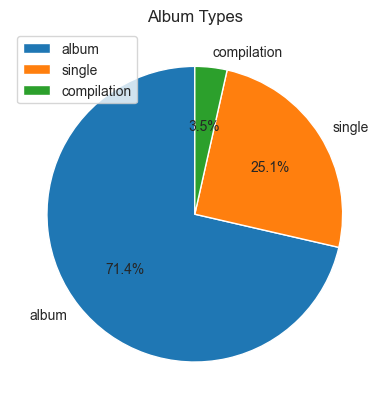

In [460]:
# Create a pie chart
labels = album_type_count.index.tolist()
sizes = album_type_count.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Album Types')
plt.legend()

plt.show()

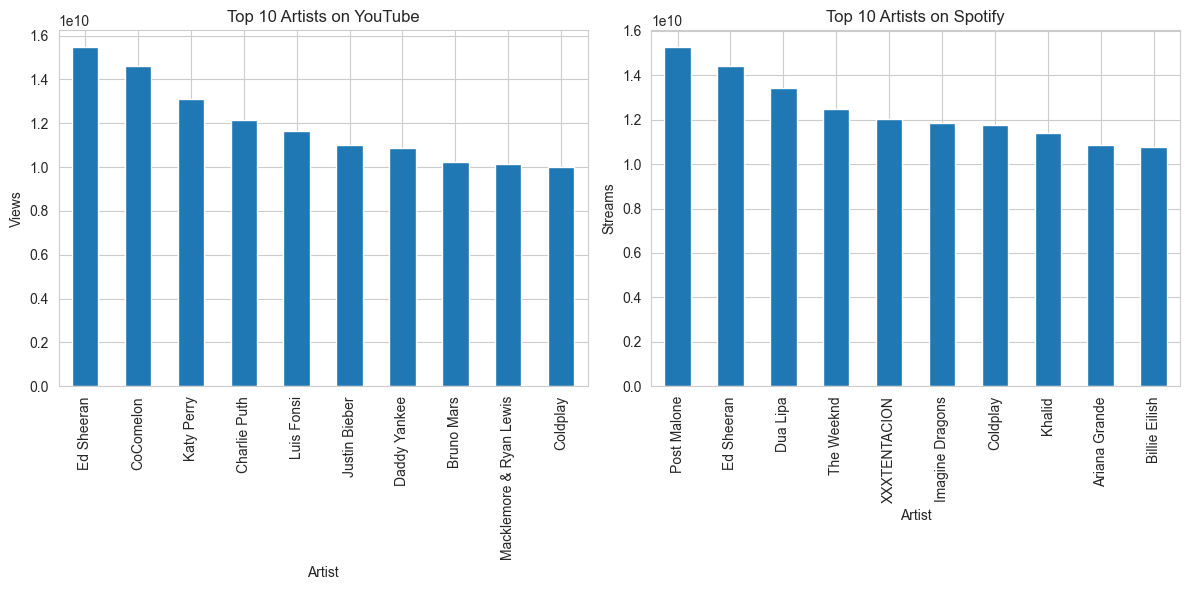

In [461]:
df_views = df.groupby('Artist')['Views'].sum().sort_values(ascending=False)[:10]
df_streams = df.groupby('Artist')['Stream'].sum().sort_values(ascending=False)[:10]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

# top 10 yt
ax1.set_title('Top 10 Artists on YouTube')
df_views.plot(kind='bar', ax=ax1)

# top 10 spotify
ax2.set_title('Top 10 Artists on Spotify')
df_streams.plot(kind='bar', ax=ax2)


ax1.set_xlabel('Artist')
ax1.set_ylabel('Views')
ax2.set_xlabel('Artist')
ax2.set_ylabel('Streams')
fig.tight_layout()
plt.show()

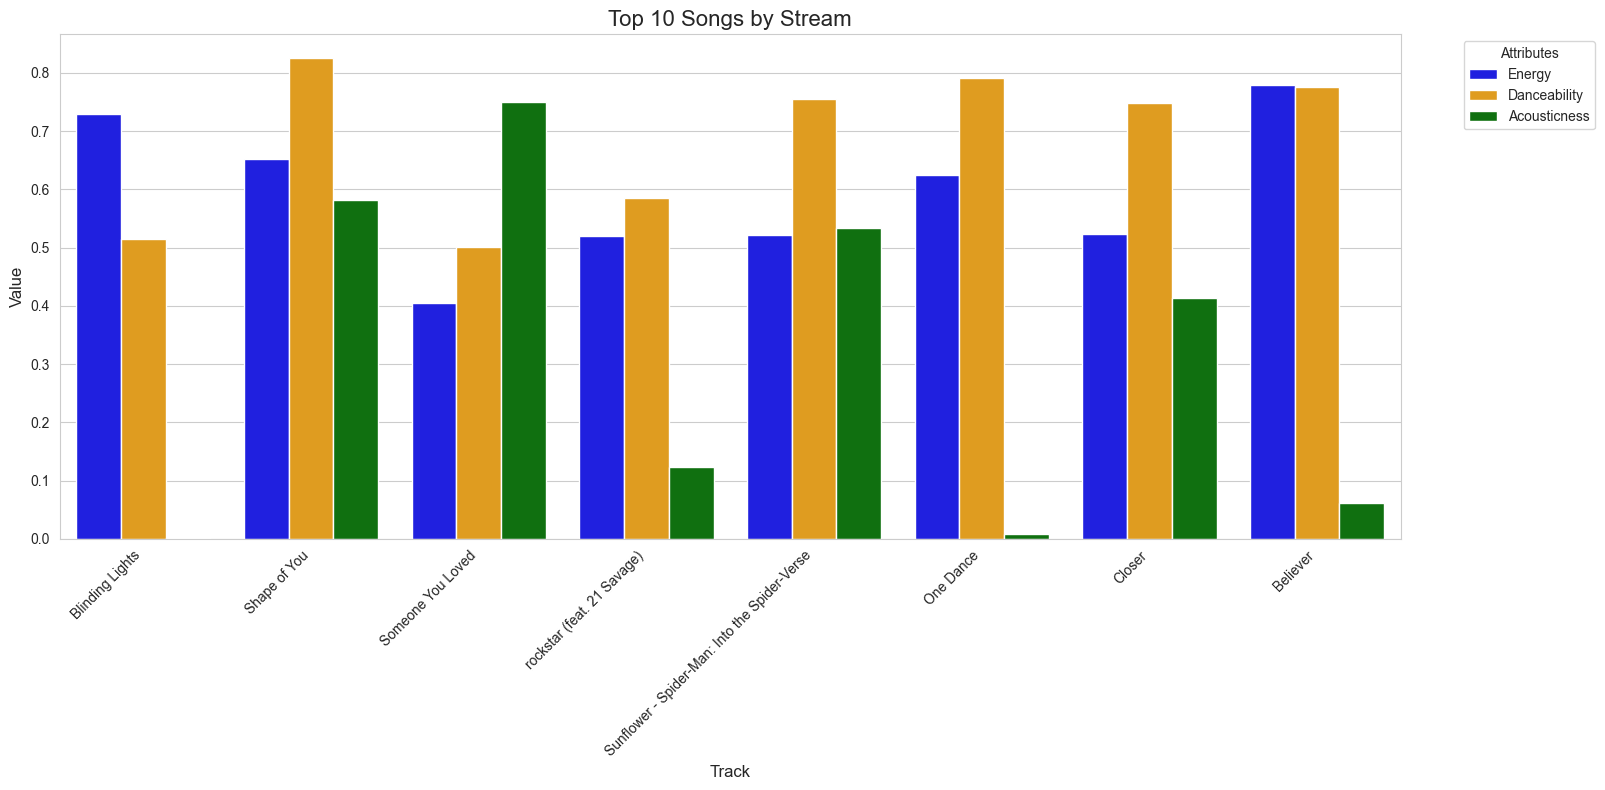

In [462]:
top_songs = df.sort_values('Stream', ascending=False).head(10)

top_songs_melt = top_songs.melt(id_vars=['Track'], value_vars=['Energy', 'Danceability', 'Acousticness'],
                                 var_name='Attribute', value_name='Value')

sns.set_style('whitegrid')

plt.figure(figsize=(16, 8))
sns.barplot(x='Track', y='Value', hue='Attribute', data=top_songs_melt,
            palette={'Energy': 'blue', 'Danceability': 'orange', 'Acousticness': 'green'})

plt.title('Top 10 Songs by Stream', fontsize=16)
plt.xlabel('Track', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.legend(title='Attributes', loc='upper right', bbox_to_anchor=(1.15, 1))

plt.tight_layout()  
plt.show()